In [2]:
#importing libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import sqrt

import sklearn.utils
from sklearn.preprocessing import RobustScaler #Scaling the features
from sklearn.model_selection import StratifiedShuffleSplit #Splitting the dataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, auc
from sklearn.model_selection import GridSearchCV #hyperparameter tuning
from sklearn.decomposition import PCA

#Visual Analysis
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import IPython

from imblearn.over_sampling import ADASYN #Adaptive Synthetic Oversampling
from collections import Counter
from scipy import stats

#Neural Networks implementation
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.utils.vis_utils import plot_model

import warnings
warnings.filterwarnings('ignore')

print('Imported successfully')

Using TensorFlow backend.


Imported successfully


#DATASET ANALYSIS AND PREPROCESSING

In [3]:
#Loading data in a dataframe 'creditcard_data' and using head() to display the first 5 instances.
creditcard_data= pd.read_csv("creditcard.csv")
creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Use parameter 'n' to display instances other than 5.
creditcard_data.head(n=20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
#Number of instances and attributes,i.e., Dimensionality of the dataset
creditcard_data.shape

(284807, 31)

In [6]:
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

This shows that there are 284807 instances and 31 attributes including the class attribute.

In [7]:
#Sum of missing cells for each attribute
creditcard_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

The 0 sum for all attributes shows that there are no missing values.

In [8]:
#Number of distinct categories or classes i.e., Fraudulent and Genuine
creditcard_data['Class'].nunique()

2

As expected, there are only 2 classes.

In [9]:
#number of instances per class
creditcard_data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

This shows a complete imbalance of classes. There are 284315 'Genuine' (0) instances and only 492 'Fraudulent' (1) instances.

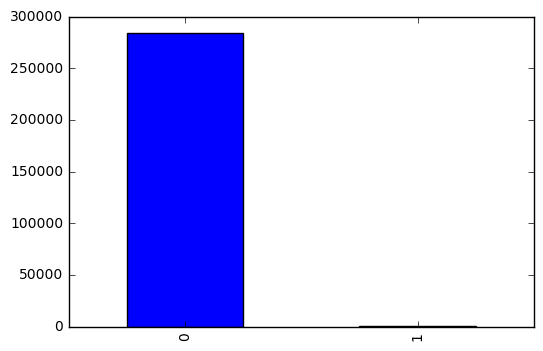

In [10]:
#visual representation of instances per class
creditcard_data.Class.value_counts().plot.bar()

This gives a visual representation of the class imbalance. The below plot after PCA gives a better visualization of the imbalnce in the datasets.

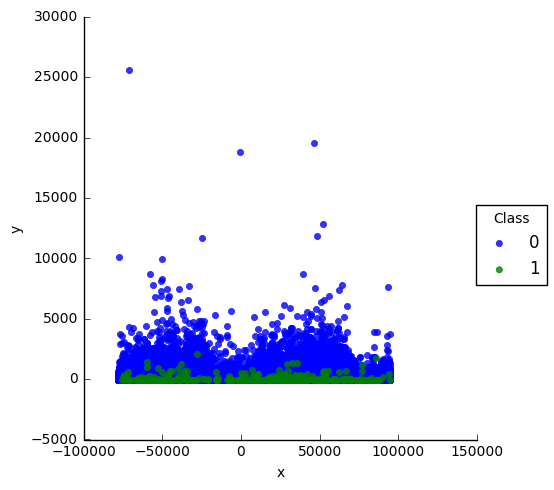

In [11]:
#Before sampling (PCA is performed for visualization only)
pca= PCA(n_components=2)
creditcard_2d= pd.DataFrame(pca.fit_transform(creditcard_data.iloc[:,0:30]))
creditcard_2d= pd.concat([creditcard_2d, creditcard_data['Class']], axis=1)
creditcard_2d.columns= ['x', 'y', 'Class']
sns.lmplot(x='x', y='y', data=creditcard_2d, fit_reg=False, hue='Class')

In [12]:
#Descriptive Statistics
creditcard_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [13]:
#checking the percentage of each class in the dataset
(creditcard_data.Class.value_counts())/(creditcard_data.Class.count())

0    0.998273
1    0.001727
Name: Class, dtype: float64

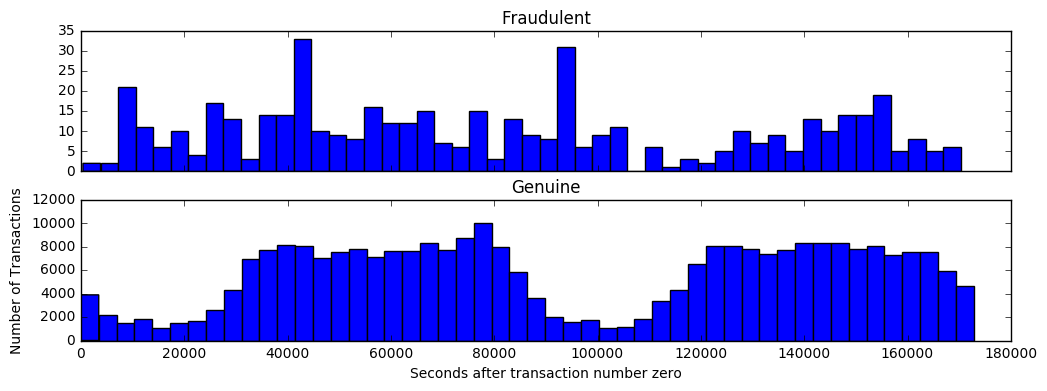

In [14]:
#Histrogram for feature Time
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(creditcard_data["Time"][creditcard_data["Class"] == 1], bins = 50)
ax1.set_title('Fraudulent')

ax2.hist(creditcard_data["Time"][creditcard_data["Class"] == 0], bins = 50)
ax2.set_title('Genuine')

plt.xlabel('Seconds after transaction number zero')
plt.ylabel('Number of Transactions')
plt.show()

The transactions occur in a cyclic way. But the time feature does not provide any useful information as the time when the first transaction was initiated is not given. Thus, we'll drop this feature.

In [15]:
#dropping Time because it does not give any valuable information
creditcard_data = creditcard_data.drop("Time", axis = 1)
creditcard_data.shape

(284807, 30)

Now there are 30 features in the dataset.

In [16]:
#Descriptive statistics for Fraudulent Transactions
print("Fraudulent Transactions")
creditcard_data['Amount'][creditcard_data['Class']==1]. describe()

Fraudulent Transactions


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
#Descriptive statistics for Genuine Transactions
print("Genuine Transactions")
creditcard_data['Amount'][creditcard_data['Class']==0]. describe()

Genuine Transactions


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Nothing much can be determined from the Amount, as most of the transactions are around 100 in both cases..

In [18]:
#Variance
creditcard_data.var()

V1            3.836489
V2            2.726820
V3            2.299029
V4            2.004684
V5            1.905081
V6            1.774946
V7            1.530401
V8            1.426479
V9            1.206992
V10           1.185594
V11           1.041855
V12           0.998403
V13           0.990571
V14           0.918906
V15           0.837803
V16           0.767819
V17           0.721373
V18           0.702539
V19           0.662662
V20           0.594325
V21           0.539526
V22           0.526643
V23           0.389951
V24           0.366808
V25           0.271731
V26           0.232543
V27           0.162919
V28           0.108955
Amount    62560.069046
Class         0.001725
dtype: float64

Amount needs to be scaled. As if a feature has a variance orders of magnitude larger than the rest of the features, then it might dominate and, make the estimator unable to learn from other features as expected.

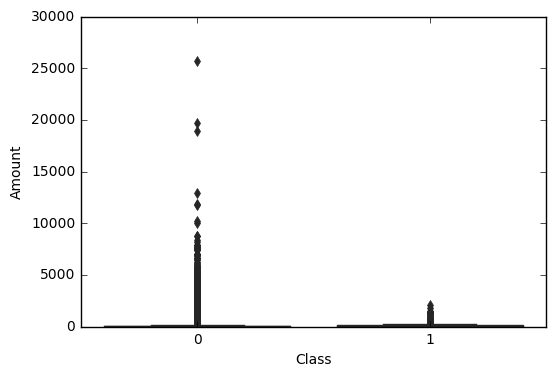

In [19]:
#Boxplot for the Amount feature, in order to visualiza the outliers.
sns.boxplot(x=creditcard_data['Class'], y=creditcard_data['Amount'])

The non-fraudulent instances are highly skewed. The outliers can be seen visually and thus, it's better to use a Robust Scaler to scale the feature 'Amount' as it is less prone to outliers.

In [20]:
#Standardizing the Amount column (All other 'V' columns are already scaled as they've undergone PCA transformation).
Rob_scaler=RobustScaler() #Robust to outliers
creditcard_data['Std_Amount'] = Rob_scaler.fit_transform(creditcard_data['Amount'].values.reshape(-1, 1))
creditcard_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Std_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.670579


In [21]:
#drop Amount and move Std_Amount at index '0'
creditcard_data = creditcard_data.drop('Amount',axis=1)

Std_Amount = creditcard_data['Std_Amount']
creditcard_data.drop('Std_Amount', axis=1, inplace=True)
creditcard_data.insert(0, 'Std_Amount', Std_Amount)
creditcard_data.head()

,Std_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [22]:
#Splitting data before sampling
#Splitting data into train and test set in 80% and 20% respectively, using Stratified Shuffle Split

X = creditcard_data.drop('Class', axis=1)
Y = creditcard_data['Class']

sss1 = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for train_index1, test_index in sss1.split(X, Y):
    print("Train:", train_index1, "Test:", test_index)
    Xtrain, Xtest = X.iloc[train_index1], X.iloc[test_index]
    Ytrain, Ytest = Y.iloc[train_index1], Y.iloc[test_index]

#Splitting the train set further into train and validation set, which leaves train set 60% of the originial dataset and, test and validation sets 20% each respectively.
sss2 = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=42)

for train_index2, val_index in sss2.split(Xtrain, Ytrain):
    print("Train:", train_index2, "Validation:", val_index)
    Xtrain_final, Xval = X.iloc[train_index2], X.iloc[val_index]
    Ytrain_final, Yval = Y.iloc[train_index2], Y.iloc[val_index]

Train: [265518 180305  42664 ...  29062  13766  17677] Test: [263020  11378 147283 ... 274532 269819  64170]
Train: [ 72227 114282  16818 ... 264471 191914 284017] Test: [202638  32978 128121 ... 244024 127667  48318]
Train: [ 20895 114622 167683 ... 244502 178972 218506] Test: [284352  82483  90981 ... 171224 168807 271602]
Train: [122248 181660 194400 ... 104631 277586  29432] Test: [225673  63348  68025 ... 279451  77554  76043]
Train: [241684 223467 136928 ...  86495 160550  49633] Test: [157557 204860  83760 ... 251478 178967 216850]
Train: [186996 144807  69756 ... 195673 152135 100500] Validation: [214502 127768  18878 ...  45194 143895 114668]
Train: [203609 160516 170008 ... 168236  40608 156569] Validation: [152253  33885 217198 ... 219379 125093 195120]
Train: [166473 135845 190847 ... 114436 217810 119523] Validation: [135986 136793 153361 ... 221564 222657 122137]
Train: [ 16294 187750  97608 ... 157188 191303 201639] Validation: [125168  42557 218854 ... 117014  95701  40

Datasets created after splitting are:
1. Train Dataset: Xtrain_final, Ytrain_final
2. Test Dataset: Xtest, Ytest
3. Validation Dataset: Xval, Yval

In [23]:
# Check if the labels are distributed equally in all the datasets after splitting
train_unique_label, train_counts_label = np.unique(Ytrain_final, return_counts=True)
test_unique_label, test_counts_label = np.unique(Ytest, return_counts=True)
val_unique_label, val_counts_label = np.unique(Yval, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(Ytrain_final))
print(test_counts_label/ len(Ytest))
print(val_counts_label/ len(Yval))

Label Distributions: 

[0.99807471 0.00192529]
[0.99827955 0.00172045]
[0.99845511 0.00154489]


As seen above, the labels are almost equally distributed in all the three datasets

In [24]:
#Dimensionality of the datasets retrieved after splitting
print(Xtrain_final.shape)
print(Ytrain_final.shape)
print(Xtest.shape)
print(Ytest.shape)
print(Xval.shape)
print(Yval.shape)

(170883, 29)
(170883,)
(56962, 29)
(56962,)
(56962, 29)
(56962,)


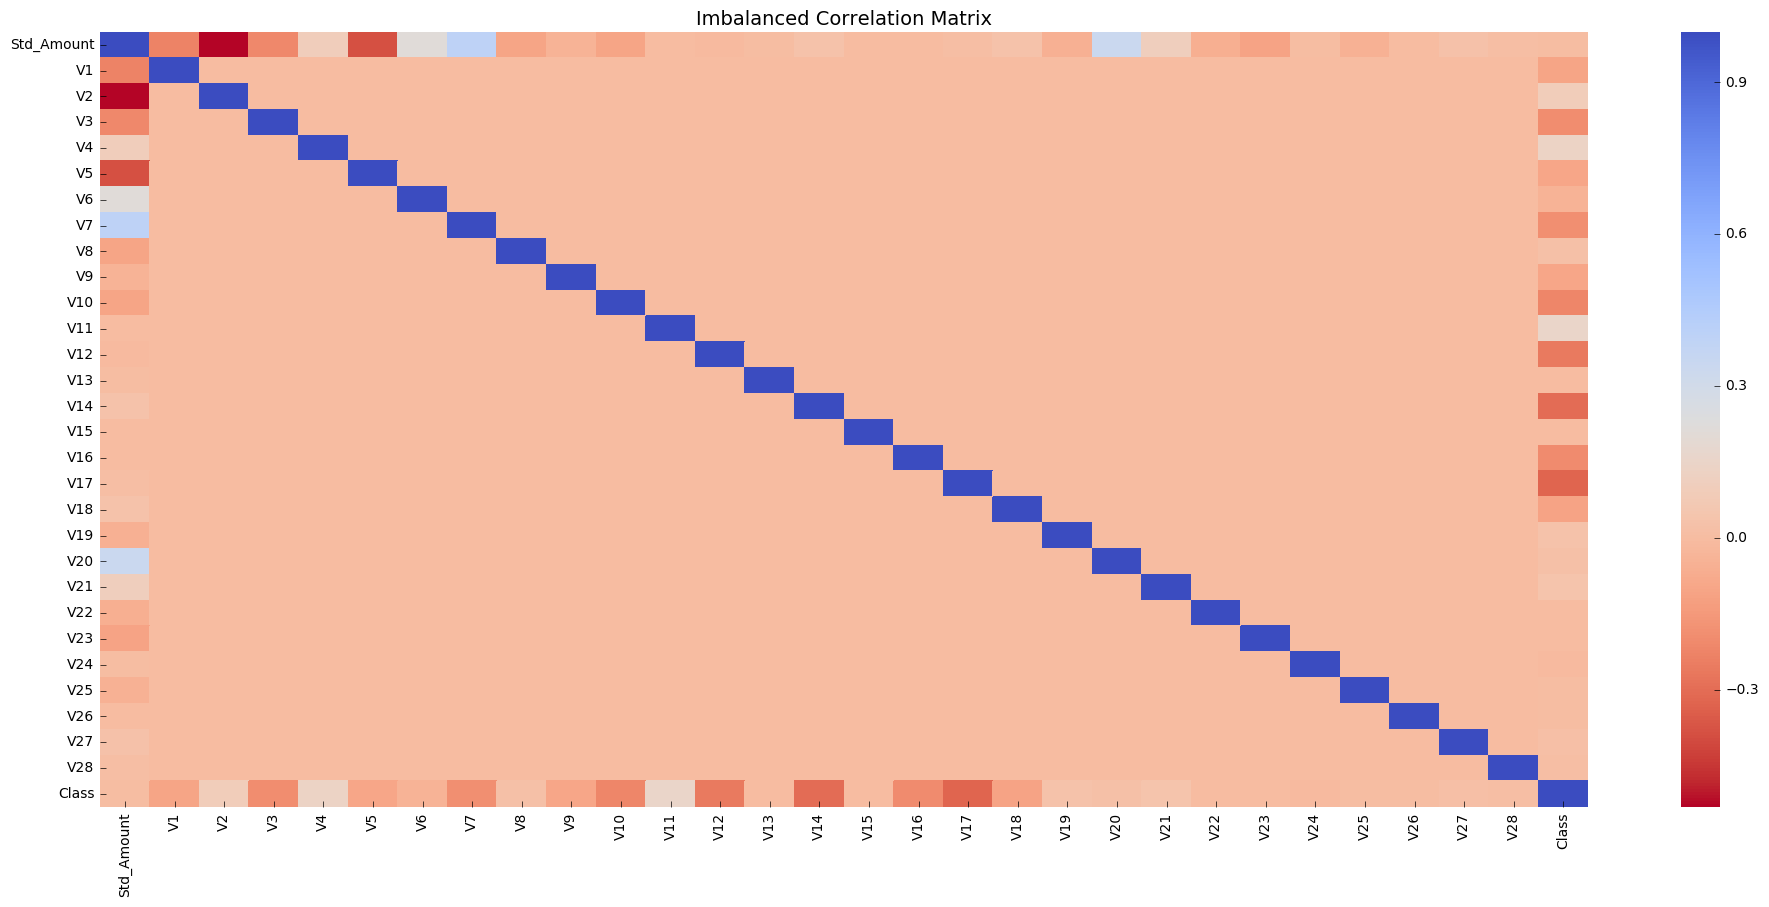

In [25]:
#checking correlation between features and the likelihood of the transaction to be fraud on the unbalanced dataset
f, ax1 = plt.subplots(figsize=(24,10))

corr = creditcard_data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)

As seen, the correlations cannot be properly visualized because of the imbalance in the dataset. This is because the correlation matrix is affected by the high imbalance betwen the classes. So, lets balance our classes and then visualize the correlation matrix again.

In [26]:
#Checking number of instances for each class in the train dataset
print(Ytrain_final.value_counts())

0    170554
1       329
Name: Class, dtype: int64


In [27]:
#Using ADASYN for Oversampling
ada = ADASYN(sampling_strategy='minority', random_state=42)

#Oversampling is applied only on the training set
X_adasampled, Y_adasampled = ada.fit_sample(Xtrain_final, Ytrain_final)
print('Resampled dataset shape %s' % Counter(Y_adasampled))
print('Shape of X_adasampled: {}'.format(X_adasampled.shape))
print('Shape of Y_adasampled: {}'.format(Y_adasampled.shape))

Resampled dataset shape Counter({1: 170555, 0: 170554})
Shape of X_adasampled: (341109, 29)
Shape of Y_adasampled: (341109,)


In [28]:
#check the disribution of both the labels
train_label, train_count = np.unique(Y_adasampled, return_counts=True)
print('Label Distributions: \n')
print(train_count/ len(Y_adasampled))

Label Distributions: 

[0.49999853 0.50000147]


In [29]:
print(type(X_adasampled))
print(type(Y_adasampled))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


 X_adasampled and Y_adasampled are the balanced train sets resulted after using OverSampling. These are ndarrays.
In order to visualize a correlation matrix, they are converted to a dataframe and joined to form a single dataframe in the below series of blocks.

In [30]:
Xsm_train_df = pd.DataFrame(X_adasampled)
Xsm_train_df.columns = Xtrain.columns
Ysm_train_df = pd.DataFrame(Y_adasampled)
Ysm_train_df = Ysm_train_df.rename(columns={0: 'Class'})
print(Xsm_train_df.head())
print(Ysm_train_df.head())

   Std_Amount        V1        V2        V3        V4        V5        V6  \
0   -0.286173 -0.313555  0.586734  3.039981  2.848687 -0.158865  0.838171   
1    0.237546  1.883183 -0.640580  0.094691  0.386752 -0.859323  0.238667   
2    1.170265 -5.593796 -3.140554 -0.055757  1.539374  1.321195  1.449076   
3   -0.267729 -0.851124  0.819195  2.014788 -0.634556 -0.166583  0.779931   
4    1.369384 -1.339343  0.842304  2.210153  3.009876 -0.501056  1.506612   

         V7        V8        V9    ...          V19       V20       V21  \
0 -0.305911  0.136755  1.081775    ...     0.211776  0.064667 -0.064730   
1 -1.172713  0.238254  2.560352    ...    -0.228614 -0.191241 -0.063316   
2  0.494910 -0.187489  1.098618    ...     0.313058 -3.165442 -0.732926   
3 -0.248282  0.440142  1.000038    ...     0.608179  0.309633  0.133497   
4  0.044767  0.574622 -0.545759    ...     1.033634  0.245178 -0.188658   

        V22       V23       V24       V25       V26       V27       V28  
0  0.538368 

In [31]:
#Merging the Xsm_train_df and Ysm_train_df based on the index values to get a single dataframe in order to visualize a correlation matrix
new_df= pd.merge(Xsm_train_df, Ysm_train_df, how='inner', left_index=True, right_index=True)
new_df.head()

,Std_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.286173,-0.313555,0.586734,3.039981,2.848687,-0.158865,0.838171,-0.305911,0.136755,1.081775,...,0.064667,-0.064730,0.538368,0.017643,0.514390,-0.970922,-0.131954,0.072962,-0.014056,0
1,0.237546,1.883183,-0.640580,0.094691,0.386752,-0.859323,0.238667,-1.172713,0.238254,2.560352,...,-0.191241,-0.063316,0.025427,0.346800,0.700140,-0.686270,0.387537,-0.060475,-0.044121,0
2,1.170265,-5.593796,-3.140554,-0.055757,1.539374,1.321195,1.449076,0.494910,-0.187489,1.098618,...,-3.165442,-0.732926,1.617461,1.182141,-1.534997,0.203254,-0.308358,-0.982457,-0.584698,0
3,-0.267729,-0.851124,0.819195,2.014788,-0.634556,-0.166583,0.779931,-0.248282,0.440142,1.000038,...,0.309633,0.133497,0.615617,-0.475375,0.010686,0.582486,-0.302416,0.486000,0.209563,0
4,1.369384,-1.339343,0.842304,2.210153,3.009876,-0.501056,1.506612,0.044767,0.574622,-0.545759,...,0.245178,-0.188658,-0.159114,-0.241138,-0.402550,0.057283,0.231537,0.067849,-0.249524,0


Hence, the data frames Xsm_train_df and Ysm_train_df are merged to form a new dataframe 'new_df', with 30 attributes in total comprising of 'Std_Amount', 'V1-V28' from Xsm_train_df and 'Class' from Ysm_train_df.

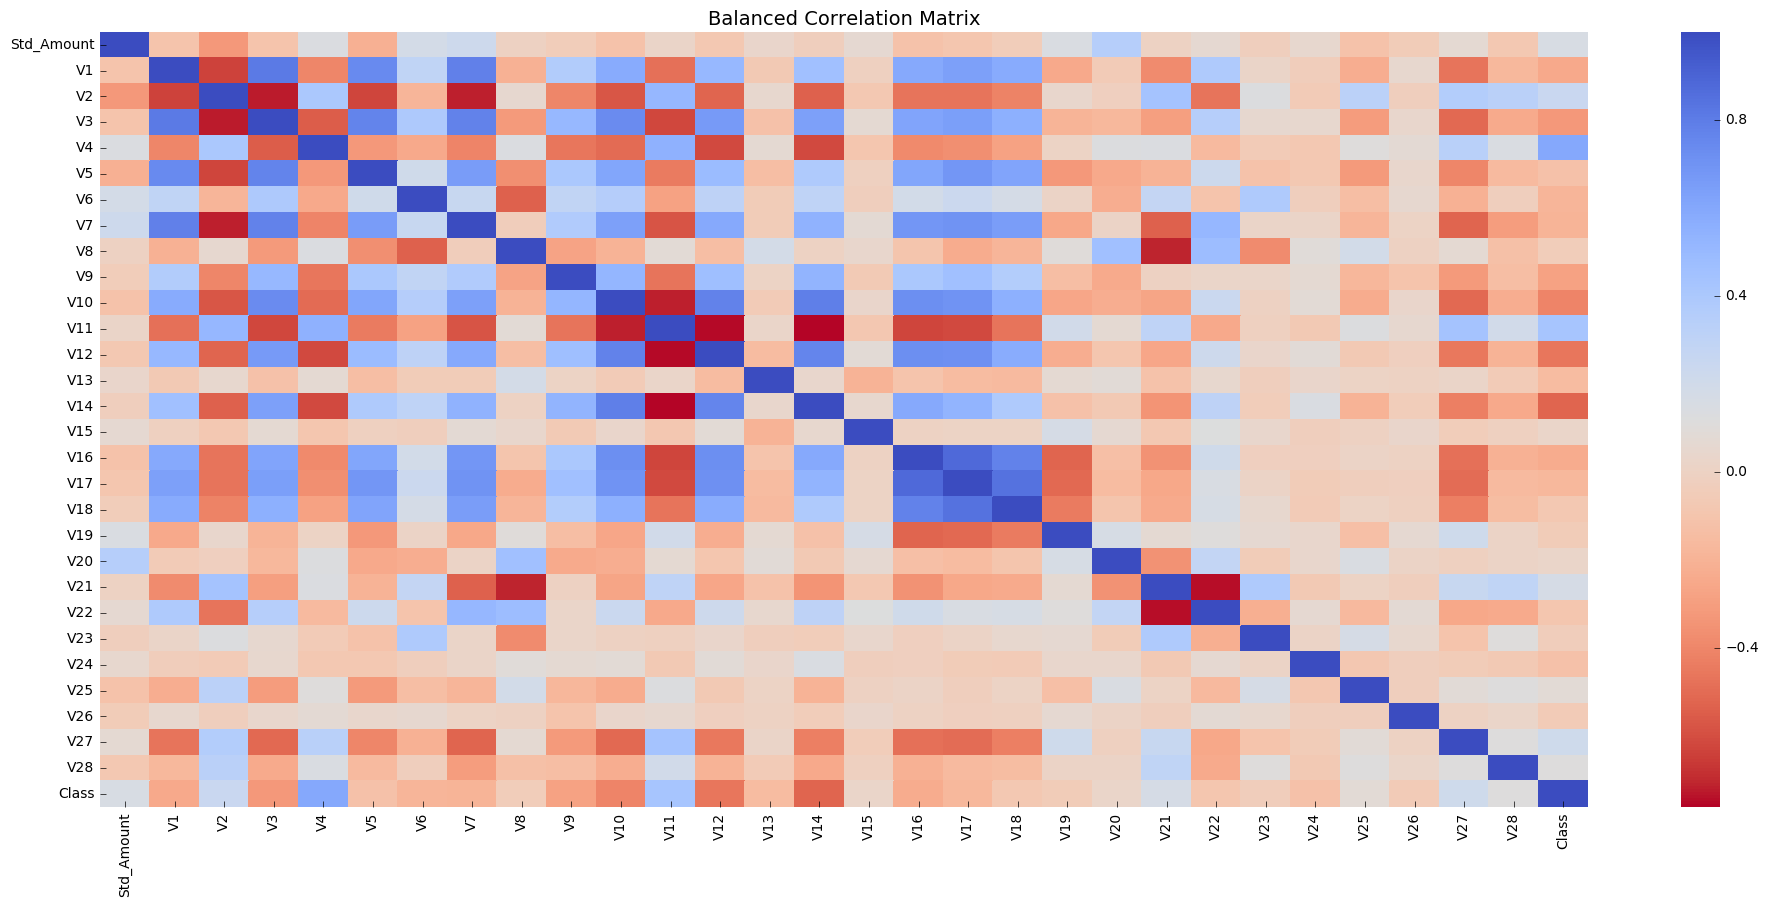

In [32]:
#checking correlation between features on the balanced dataset
f, ax1 = plt.subplots(figsize=(24,10))

corr = new_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Balanced Correlation Matrix", fontsize=14)

Negative and Positive Correlations can be seen in the matrix above:
* Features, V14, V12, V10 and V3 show negative correlation towards the 'Class', As, lower are these values, more likely the transaction is Fraud.
* Features V4, V11, V2 and V19 show positive correlation. As, higher are these values, more likely the transaction is Fraud.


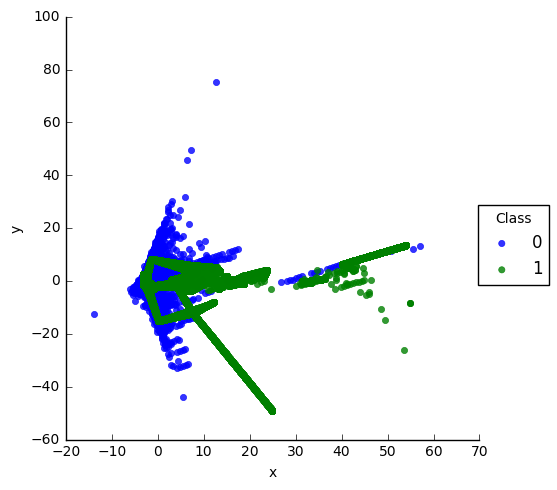

In [33]:
#visualizing balanced train dataset
X_df= pd.DataFrame(X_adasampled)
Y_df= pd.DataFrame(Y_adasampled)
Y_df=Y_df.rename(columns={0: 'Class'})
train_2d= pd.DataFrame(pca.fit_transform(X_df.iloc[:,0:29]))
train_2d= pd.concat([train_2d, Y_df], axis=1)
train_2d.columns= ['x', 'y', 'Class']
sns.lmplot(x='x', y='y', data=train_2d, fit_reg=False, hue='Class')

The above plot gives a visual representation of the balanced dataset. As seen, the data is not linearly separable. Hence, a Multi-Layer Perceptron is trained on this data, in order to predict the data as 'fraud' or 'genuine'.
For the training of the Multi-layer perceptron, many parameters need to be tuned, thus a Grid-Search is used for this purpose. The Grid-Search is performed on the subset of the data, as it takes a lot of time to run. The following blocks create a subset of the dataset using random undersampling used only for this purpose.

In [34]:
#An undersampled dataset is created to tune the parameters using Grid-Search
Ytrain_df = pd.DataFrame(Ytrain_final)
Ytrain_df = Ytrain_df.rename(columns={0: 'Class'})
Train_set= pd.merge(Xtrain_final, Ytrain_df, how='inner', left_index=True, right_index=True)
Train_set.head()

,Std_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
14162,-0.286173,-0.313555,0.586734,3.039981,2.848687,-0.158865,0.838171,-0.305911,0.136755,1.081775,...,0.064667,-0.064730,0.538368,0.017643,0.514390,-0.970922,-0.131954,0.072962,-0.014056,0
152802,0.237546,1.883183,-0.640580,0.094691,0.386752,-0.859323,0.238667,-1.172713,0.238254,2.560352,...,-0.191241,-0.063316,0.025427,0.346800,0.700140,-0.686270,0.387537,-0.060475,-0.044121,0
227171,1.170265,-5.593796,-3.140554,-0.055757,1.539374,1.321195,1.449076,0.494910,-0.187489,1.098618,...,-3.165442,-0.732926,1.617461,1.182141,-1.534997,0.203254,-0.308358,-0.982457,-0.584698,0
217316,-0.267729,-0.851124,0.819195,2.014788,-0.634556,-0.166583,0.779931,-0.248282,0.440142,1.000038,...,0.309633,0.133497,0.615617,-0.475375,0.010686,0.582486,-0.302416,0.486000,0.209563,0
80544,1.369384,-1.339343,0.842304,2.210153,3.009876,-0.501056,1.506612,0.044767,0.574622,-0.545759,...,0.245178,-0.188658,-0.159114,-0.241138,-0.402550,0.057283,0.231537,0.067849,-0.249524,0


In [35]:
Train_set.shape

(170883, 30)

In [36]:
#Length of Frauds
length_frauds=len(Train_set[Train_set.Class==1])
length_frauds

329

In [37]:
#Taking only Frauds in a dataframe
fraud_df= Train_set.loc[Train_set['Class'] == 1]
fraud_df.head()

,Std_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
143188,-0.279466,-3.003459,2.096150,-0.487030,3.069453,-1.774329,0.251804,-4.328776,-2.425478,-0.985222,...,0.692537,0.163967,1.245648,-0.269241,0.537102,-0.220757,-0.059555,0.460710,-0.033551,1
86155,1.110878,-2.756007,0.683821,-1.390169,1.501887,-1.165614,-0.131207,-1.478741,-0.246922,-0.100523,...,-0.106945,0.320474,0.611027,0.174864,-0.502151,-0.174713,1.179242,-1.166315,0.821215,1
9487,-0.293440,-4.153014,8.204797,-15.031714,10.330100,-3.994426,-3.250013,-10.415698,4.620804,-5.711248,...,1.412625,1.976988,0.256510,0.485908,-1.198821,-0.526567,0.634874,1.627209,0.723235,1
163586,0.600852,0.949241,1.333519,-4.855402,1.835006,-1.053245,-2.562826,-2.286986,0.260906,-0.895366,...,0.424608,0.306598,-0.854627,0.101177,-0.281497,0.024444,-0.107944,0.625289,0.315677,1
223578,-0.183050,-5.256434,0.364541,-5.412085,2.400031,0.697301,-1.998755,-5.835532,-0.887739,-2.828287,...,-0.403685,-0.648259,0.511285,-1.110045,0.178987,0.220235,-0.699809,0.580487,-0.173630,1


In [38]:
#Taking only Non-frauds
non_fraud_df= Train_set.loc[Train_set['Class'] == 0]
#Randomly select the same number of records as the Frauds
non_frauds=non_fraud_df.sample(n=length_frauds)
non_frauds.shape

(329, 30)

In [39]:
#Appending both Frauds and Non-Frauds
undersampled_df= fraud_df.append(non_frauds)
#Randomly shuffling all the instances
undersampled_df = sklearn.utils.shuffle(undersampled_df)
undersampled_df.head()

,Std_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
185761,1.362398,-2.755014,0.691804,1.628561,0.718662,-0.754474,0.823553,0.037754,0.389080,1.591858,...,0.499870,-0.182649,0.601835,-0.357145,0.554795,0.699631,-0.307378,0.480947,0.262258,0
196396,5.613219,1.013817,-1.356126,0.126312,3.894255,-0.778524,1.602502,-0.677590,0.481415,-0.115929,...,0.584551,0.487934,0.421571,-0.114341,0.308853,-0.645033,-0.099955,-0.045937,0.047170,0
112840,0.321805,-1.111495,-0.257575,2.250210,1.152671,0.432904,1.254126,-0.584163,-0.609682,1.014602,...,-0.510614,0.862913,0.927825,-0.343058,-0.256268,-0.600742,-0.180331,0.026762,-0.358335,1
206214,16.041361,-3.130560,-2.413768,-0.019573,-0.323426,-3.416320,1.730652,4.002696,0.313401,-0.743955,...,2.296189,0.941357,0.384561,2.270995,-0.472775,1.059437,0.363632,-0.543652,0.039280,0
176405,-0.294977,2.106930,0.149083,-1.932238,0.277875,0.731753,-0.476021,0.168788,-0.184063,0.506436,...,-0.135880,-0.393839,-1.009498,0.276959,-0.065273,-0.193593,0.210670,-0.059045,-0.036436,0


In [40]:
#Separating labels from the other features
X_undersample = undersampled_df.drop('Class', axis=1)
Y_undersample = undersampled_df['Class']
print(X_undersample.shape)
print(Y_undersample.shape)
X_undersample.head()

(658, 29)
(658,)


,Std_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
185761,1.362398,-2.755014,0.691804,1.628561,0.718662,-0.754474,0.823553,0.037754,0.389080,1.591858,...,0.241650,0.499870,-0.182649,0.601835,-0.357145,0.554795,0.699631,-0.307378,0.480947,0.262258
196396,5.613219,1.013817,-1.356126,0.126312,3.894255,-0.778524,1.602502,-0.677590,0.481415,-0.115929,...,-1.670784,0.584551,0.487934,0.421571,-0.114341,0.308853,-0.645033,-0.099955,-0.045937,0.047170
112840,0.321805,-1.111495,-0.257575,2.250210,1.152671,0.432904,1.254126,-0.584163,-0.609682,1.014602,...,0.407188,-0.510614,0.862913,0.927825,-0.343058,-0.256268,-0.600742,-0.180331,0.026762,-0.358335
206214,16.041361,-3.130560,-2.413768,-0.019573,-0.323426,-3.416320,1.730652,4.002696,0.313401,-0.743955,...,-0.891134,2.296189,0.941357,0.384561,2.270995,-0.472775,1.059437,0.363632,-0.543652,0.039280
176405,-0.294977,2.106930,0.149083,-1.932238,0.277875,0.731753,-0.476021,0.168788,-0.184063,0.506436,...,0.188840,-0.135880,-0.393839,-1.009498,0.276959,-0.065273,-0.193593,0.210670,-0.059045,-0.036436


In [41]:
#Converting undersampled train sets in numpy arrays
X_us_arr= X_undersample.values
Y_us_arr= Y_undersample.values

In [42]:
#Converting test and validation dataframes in numpy arrays
Xval_arr=Xval.values
Yval_arr=Yval.values
Xtest_arr=Xtest.values
Ytest_arr=Ytest.values

The code in the following block is used for hyperparameter tuning of different parameters required for the training of a multilayer perceptron. It is commented as it takes alot of time to run. It is run on the undersampled dataset created above. Moreover, the biggest challenge is reproducability. Even after using the seed, the outputs produced vary a bit. But after multiple runs, the parameters that were returned were:
neuron_1=65, 
dropout_rate=0.5, 
init_mode='he_normal', 
learn_rate=0.001

In [43]:
# #Grid Search for hyperparameter tuning
# def create_model(neuron_1=29, dropout_rate=0.0, init_mode='uniform', learn_rate=0.01):
#     n_inputs = X_undersample.shape[1]
#     model = Sequential()
#     model.add(Dense(neuron_1, input_shape=(n_inputs, ), kernel_initializer=init_mode, activation= 'relu'))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
#     model.compile(Adam(lr=learn_rate), loss='binary_crossentropy')
#     return model
# #Keras models can be used with scikit learn by wrapping them with KerasClassifier
# model_tuning = KerasClassifier(build_fn=create_model,epochs=30, batch_size=700, verbose=1)

# neuron_1= [29, 30, 35, 40, 45, 50,55,60,65,70]
# learn_rate= [0.001, 0.01, 0.1, 0.2, 0.3]
# dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
# param_grid = dict(neuron_1=neuron_1, dropout_rate=dropout_rate, init_mode=init_mode, learn_rate=learn_rate)
# grid = GridSearchCV(estimator=model_tuning, param_grid=param_grid, scoring=make_scorer(f1_score), cv=5, n_jobs=-1)
# grid_result = grid.fit(X_us_arr, Y_us_arr)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# mean_score = grid_result.cv_results_['mean_test_score']
# std_score = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(mean_score, std_score, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))


#EXPERIMENTAL DESIGN

Hypothesis: A neural network�s performance on the Credit-Card Fraud dataset is affected by the number of hidden layers.
* Null Hypothesis (H0): Insufficient evidence to support hypothesis
* Alternate Hypothesis (H1): Evidence suggests the hypothesis is likely true.

In this notebook, 2 models are trained:
1. Multi-layer Perceptron with 1 hidden layer and,
2. Multi-layer Perceptron with 2 hidden layers
1. Rest all parameters are kept the same in both the models.

Since, Neural Networks are stochastic and output different results for each run with the same data. The model will be run for a specific number of iterations so that the average score of all the repetitions can determine the skill of the model. Thus, now this sample size sufficiency needs to be determined. For this purpose the multi layer perceptron  model is trained for 100 (selected randomly) iterations and F-score is returned for all the repetitions.

The iterations below were run to determine the sufficient sample size required. The output returned is:
f_scorelist1= [0.7627118644067796, 0.749003984063745, 0.7419354838709676, 0.7457627118644068, 0.7018867924528301, 0.7294117647058823, 0.6643109540636042, 0.753968253968254, 0.7018867924528301, 0.6888888888888889, 0.6478873239436619, 0.7430830039525692, 0.7410358565737051, 0.7479674796747967, 0.7175572519083968, 0.7634854771784232, 0.7265625, 0.6690647482014389, 0.7159533073929961, 0.7258064516129031, 0.7540983606557377, 0.7315175097276265, 0.7045454545454546, 0.7580645161290323, 0.7076923076923076, 0.6816479400749064, 0.7407407407407407, 0.7041198501872659, 0.7209302325581397, 0.7171314741035857, 0.6789667896678966, 0.7272727272727273, 0.732283464566929, 0.7583333333333334, 0.73015873015873, 0.7230769230769232, 0.7531380753138075, 0.7459016393442623, 0.6893939393939396, 0.7622950819672131, 0.7295081967213115, 0.7450980392156862, 0.7782426778242677, 0.6992481203007519, 0.748971193415638, 0.7126436781609196, 0.7364341085271319, 0.6842105263157894, 0.7317073170731707, 0.7848101265822784, 0.7104247104247104, 0.6666666666666666, 0.7591836734693878, 0.7401574803149606, 0.6946564885496183, 0.7272727272727273, 0.7175572519083968, 0.6946564885496183, 0.6940298507462687, 0.7109375, 0.6966292134831462, 0.7510204081632654, 0.7603305785123966, 0.6713780918727914, 0.7460317460317459, 0.7398373983739839, 0.7449392712550608, 0.673913043478261, 0.6881720430107526, 0.7551867219917012, 0.7215686274509804, 0.6789667896678966, 0.6966292134831462, 0.7551867219917012, 0.7666666666666667, 0.7215686274509804, 0.732283464566929, 0.732283464566929, 0.7181467181467182, 0.7250996015936256, 0.6791044776119403, 0.7109375, 0.7203065134099617, 0.7410358565737051, 0.7603305785123966, 0.681159420289855, 0.7551867219917012, 0.7368421052631579, 0.7142857142857143, 0.6416382252559727, 0.7294117647058823, 0.7531380753138075, 0.7698744769874477, 0.7131782945736435, 0.775, 0.5987261146496816, 0.7099236641221374, 0.7265625, 0.7372549019607844, 0.7280000000000001]

* The following code is commented as it was run for 100 iterations to determine the sufficient sample size, and it takes alot of time to run. The results are shown above and plotted in the following blocks.

In [44]:
# f_scorelist1=[]

# n_inputs = X_adasampled.shape[1]
# es= keras.callbacks.EarlyStopping(monitor='val_loss',
#                               min_delta=0,
#                               patience=2,
#                               verbose=0, mode='min', restore_best_weights= True)
# for i in range(0,100):
#     First_Model = Sequential()
#     First_Model.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
#     First_Model.add(Dropout(0.5))
#     First_Model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

#     First_Model.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
#     First_Model.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=0)
#     Y_first_pred = First_Model.predict_classes(Xtest_arr, batch_size=200, verbose=0)
    
#     f_score= f1_score(Ytest_arr,Y_first_pred)
#     f_scorelist1.append(f_score)

# print(f_scorelist1)
# print('FScore Mean: '+ str(np.mean(f_scorelist1)))

Now, the number of iterations are plotted against the average score from those iterations to determine the number of iterations at which the mean of the F-score gets stabilized.
These number of iterations will be considered as the sample size sufficiency, for which our model will be iterated.

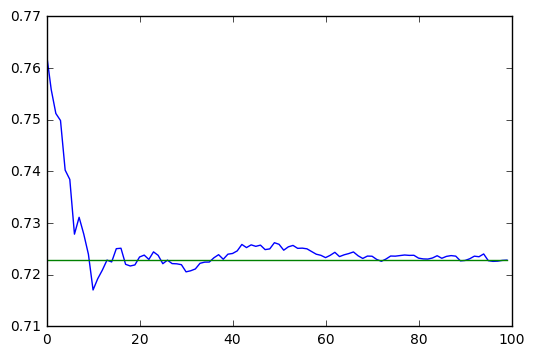

In [45]:
#Plotting number of repeats against the average score from those repeats.
#Expected: As the number of repeats increase, the average score stabilizes
f_score_list=[0.7627118644067796, 0.749003984063745, 0.7419354838709676, 0.7457627118644068, 0.7018867924528301, 0.7294117647058823, 0.6643109540636042, 0.753968253968254, 0.7018867924528301, 0.6888888888888889, 0.6478873239436619, 0.7430830039525692, 0.7410358565737051, 0.7479674796747967, 0.7175572519083968, 0.7634854771784232, 0.7265625, 0.6690647482014389, 0.7159533073929961, 0.7258064516129031, 0.7540983606557377, 0.7315175097276265, 0.7045454545454546, 0.7580645161290323, 0.7076923076923076, 0.6816479400749064, 0.7407407407407407, 0.7041198501872659, 0.7209302325581397, 0.7171314741035857, 0.6789667896678966, 0.7272727272727273, 0.732283464566929, 0.7583333333333334, 0.73015873015873, 0.7230769230769232, 0.7531380753138075, 0.7459016393442623, 0.6893939393939396, 0.7622950819672131, 0.7295081967213115, 0.7450980392156862, 0.7782426778242677, 0.6992481203007519, 0.748971193415638, 0.7126436781609196, 0.7364341085271319, 0.6842105263157894, 0.7317073170731707, 0.7848101265822784, 0.7104247104247104, 0.6666666666666666, 0.7591836734693878, 0.7401574803149606, 0.6946564885496183, 0.7272727272727273, 0.7175572519083968, 0.6946564885496183, 0.6940298507462687, 0.7109375, 0.6966292134831462, 0.7510204081632654, 0.7603305785123966, 0.6713780918727914, 0.7460317460317459, 0.7398373983739839, 0.7449392712550608, 0.673913043478261, 0.6881720430107526, 0.7551867219917012, 0.7215686274509804, 0.6789667896678966, 0.6966292134831462, 0.7551867219917012, 0.7666666666666667, 0.7215686274509804, 0.732283464566929, 0.732283464566929, 0.7181467181467182, 0.7250996015936256, 0.6791044776119403, 0.7109375, 0.7203065134099617, 0.7410358565737051, 0.7603305785123966, 0.681159420289855, 0.7551867219917012, 0.7368421052631579, 0.7142857142857143, 0.6416382252559727, 0.7294117647058823, 0.7531380753138075, 0.7698744769874477, 0.7131782945736435, 0.775, 0.5987261146496816, 0.7099236641221374, 0.7265625, 0.7372549019607844, 0.7280000000000001]
f_df=pd.DataFrame(f_score_list)
fscores= f_df.values
final_mean= np.mean(fscores[0:101])
means = list()
for i in range(1,len(f_score_list)+1):
    data = fscores[0:i, 0]
    mean_fscore = np.mean(data)
    means.append(mean_fscore)
# line plot of the values generated in the list
plt.plot(means)
plt.plot([final_mean for x in range(len(means))])
plt.show() #From this plot the point of diminishing returns can be located.

As seen in the plot above, the average of F-score is getting stabilized after 60 iterations. Thus, the sample size sufficiency is taken as 60, which means that the model will be trained for 60 repetitions and the overall average of the score from these iterations will determine the skill of the model.

#IMPLEMENTATION

In [46]:
#function for confusion matrix
def conf_matrix(predicted_values):
    Predictions_CM = confusion_matrix(Ytest_arr, predicted_values, labels = [0, 1])
    class_feat=creditcard_data['Class'].copy()
    class_feat= class_feat.unique()
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(Predictions_CM, annot=True, fmt='d', xticklabels=class_feat, yticklabels=class_feat)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

In [47]:
#Training a Multi-layer perceptron with 1 hidden layer on Oversampled dataset without using dropout and, using the parameters tuned above.
n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
#Model Creation
Model1 = Sequential()
Model1.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model1.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

#Compile Model
Model1.compile(Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
Model1.summary()

#Fit Model
history1= Model1.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=30, callbacks=[es], shuffle=True, verbose=2)
print(history1.history.keys())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 65)                1950      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 66        
Total params: 2,016
Trainable params: 2,016
Non-trainable params: 0
_________________________________________________________________
Train on 341109 samples, validate on 56962 samples
Epoch 1/30
 - 7s - loss: 0.0538 - acc: 0.9837 - val_loss: 0.0171 - val_acc: 0.9958
Epoch 2/30
 - 2s - loss: 0.0102 - acc: 0.9980 - val_loss: 0.0140 - val_acc: 0.9972
Epoch 3/30
 - 2s - loss: 0.0064 - acc: 0.9989 - val_loss: 0.0154 - val_acc: 0.9973
Epoch 4/30
 - 2s - loss: 0.0052 - acc: 0.9992 - val_loss: 0.0109 - val_acc: 0.9985
Epoch 5/30
 - 2s - loss: 0.0048 - acc: 0.9993 - val_loss: 0.0105 - val_acc: 0.9986
Epoch 6/30
 - 2s - loss: 0.0040 - acc: 0.9995 - val_loss: 0.0111 - val

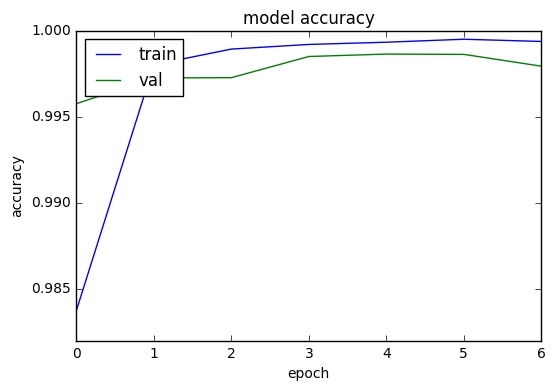

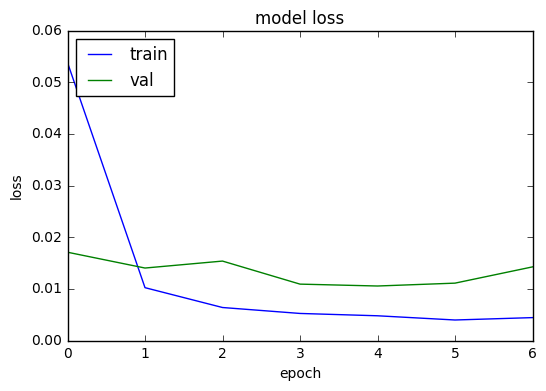

In [48]:
# summarize history for accuracy
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

The variation in the performance of the train and validation data shows that it has been overlearned on the train dataset. So, let's try adding Dropout and see it's effect on the performance of the model.

In [49]:
#Training a Multi-layer perceptron with 1 hidden layer on Oversampled dataset using the parameters tuned above and adding a Dropout.
n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
Model1_drop = Sequential()
Model1_drop.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model1_drop.add(Dropout(0.5))
Model1_drop.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model1_drop.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
Model1_drop.summary()

history2= Model1_drop.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=2)
print(history2.history.keys())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 65)                1950      
_________________________________________________________________
dropout_1 (Dropout)          (None, 65)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 66        
Total params: 2,016
Trainable params: 2,016
Non-trainable params: 0
_________________________________________________________________
Train on 341109 samples, validate on 56962 samples
Epoch 1/40
 - 4s - loss: 0.3845 - acc: 0.8516 - val_loss: 0.1381 - val_acc: 0.9547
Epoch 2/40
 - 3s - loss: 0.1514 - acc: 0.9497 - val_loss: 0.0873 - val_acc: 0.9698
Epoch 3/40
 - 3s - loss: 0.1021 - acc: 0.9711 - val_loss: 0.0620 - val_acc: 0.9784
Epoch 4/40
 - 3s - loss: 0.0759 - acc: 0.9809 - val_loss: 0.0479 - val_acc: 0.9839
Epoch 5/40
 - 3s - lo

In [50]:
# #get the model
# plot_model(Model1_drop, to_file='Model1_drop.png', show_shapes=True)
# IPython.display.Image('Model1_drop.png')

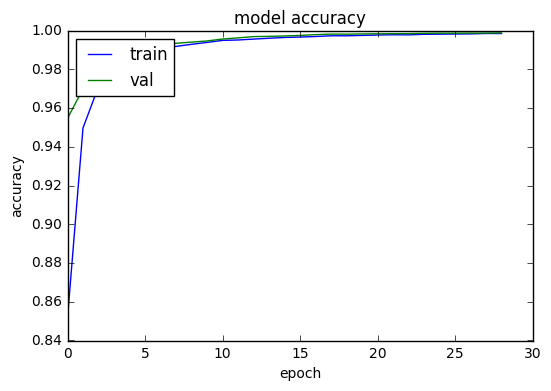

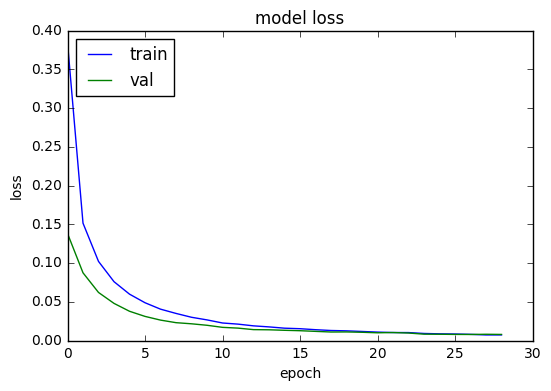

In [51]:
# summarize history for accuracy
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

As observed, with the addition of Dropout, the validation dataset performs better. And the train and vaidation set performance is comparable.

56962/56962 [==============================] - 2s 28us/step
Accuracy Model1 (Dropout): 0.9986482216214319
Recall_score: 0.9489795918367347
Precision_score: 0.5636363636363636
F-score: 0.7072243346007604


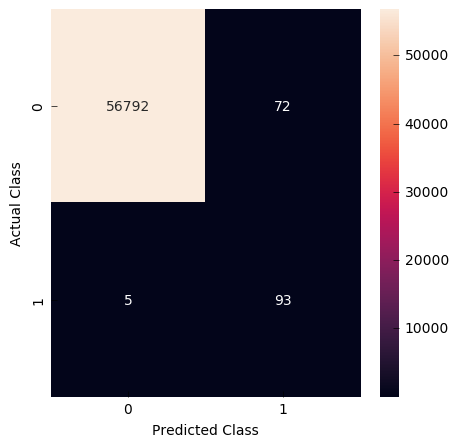

In [52]:
Y_pred_cls = Model1_drop.predict_classes(Xtest_arr, batch_size=200, verbose=0)
print('Accuracy Model1 (Dropout): '+ str(Model1_drop.evaluate(Xtest_arr,Ytest_arr)[1]))
print('Recall_score: ' + str(recall_score(Ytest_arr,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(Ytest_arr, Y_pred_cls)))
print('F-score: ' + str(f1_score(Ytest_arr,Y_pred_cls)))
conf_matrix(Y_pred_cls)

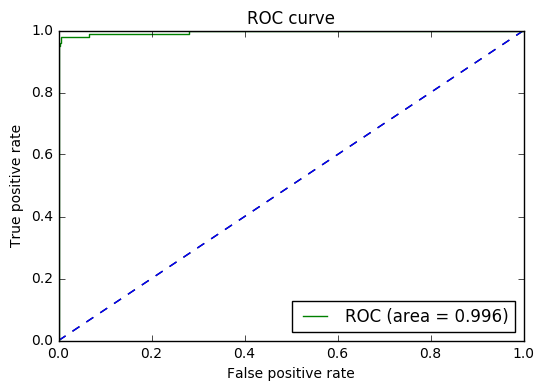

In [53]:
#Plotting ROC curve
Y_pred_prob = Model1_drop.predict_proba(Xtest_arr).ravel()

fpr_model1, tpr_model1, thresholds_model1 = roc_curve(Ytest_arr, Y_pred_prob, pos_label=1)
auc_model1 = roc_auc_score(Ytest_arr, Y_pred_prob)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
#plot the roc curve for the model
plt.plot(fpr_model1, tpr_model1, label='ROC (area = {:.3f})'.format(auc_model1))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

ROC curves are generally not well suited for imbalanced datasets, as they make use of TN. Thus, they can be deceptive. In contrast, TN are not considered in the PR-curve. Hence, they are more suitable for an imbalanced classification.

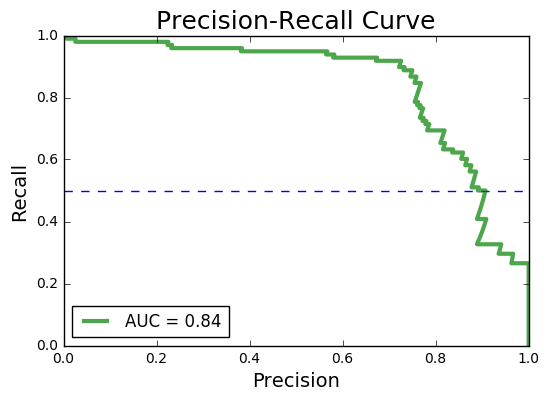

In [54]:
#Calculating Precision and Recall for various thresholds
precision, recall, thresholds_pr = precision_recall_curve(Ytest_arr, Y_pred_prob)

#Auc for PR curve
AUC_PRcurve= auc(recall, precision)

plt.figure(1)
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
#plot PR curve
plt.plot(precision, recall, label = "AUC = {:0.2f}".format(AUC_PRcurve), lw = 3, alpha = 0.7)
plt.xlabel('Precision', fontsize = 14)
plt.ylabel('Recall', fontsize = 14)
plt.title('Precision-Recall Curve', fontsize = 18)
plt.legend(loc='best')
plt.show()

In [55]:
#Training Multi-layer Perceptron with single hidden layer for 60 iterations and, appending the F-score for each iteration.
f_scorelist1=[]

n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
for i in range(0,60):
    First_Model = Sequential()
    First_Model.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
    First_Model.add(Dropout(0.5))
    First_Model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

    First_Model.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
    First_Model.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=0)
    Y_first_pred = First_Model.predict_classes(Xtest_arr, batch_size=200, verbose=0)
    
    f_score= f1_score(Ytest_arr,Y_first_pred)
    f_scorelist1.append(f_score)

print(f_scorelist1)
print('FScore Mean: '+ str(np.mean(f_scorelist1)))
print('-'*88)

[0.732283464566929, 0.7540983606557377, 0.7272727272727273, 0.7634854771784232, 0.6917293233082707, 0.72, 0.7153846153846155, 0.7460317460317459, 0.744, 0.6980392156862744, 0.7258687258687259, 0.6842105263157894, 0.7530364372469635, 0.7209302325581397, 0.7673469387755103, 0.73015873015873, 0.7181467181467182, 0.7209302325581397, 0.7114624505928854, 0.7866108786610879, 0.7076923076923076, 0.7591836734693878, 0.7368421052631579, 0.652482269503546, 0.6715867158671587, 0.6996197718631179, 0.7237354085603112, 0.748971193415638, 0.6714801444043321, 0.7230769230769232, 0.7137254901960784, 0.7398373983739839, 0.7479674796747967, 0.7563025210084034, 0.7380952380952381, 0.6893939393939396, 0.7666666666666667, 0.6969696969696971, 0.6618705035971222, 0.7222222222222223, 0.73015873015873, 0.6940298507462687, 0.7315175097276265, 0.736, 0.5475504322766571, 0.6996197718631179, 0.7380952380952381, 0.71875, 0.7222222222222223, 0.7244094488188976, 0.7717842323651452, 0.7603305785123966, 0.603896103896103

In [56]:
#Training Multi-layer perceptron with 2 hidden layers
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
Model2 = Sequential()
Model2.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(65, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model2.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod2= Model2.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=2)
print(his_mod2.history.keys())

Train on 341109 samples, validate on 56962 samples
Epoch 1/40
 - 19s - loss: 0.3883 - acc: 0.8552 - val_loss: 0.1303 - val_acc: 0.9517
Epoch 2/40
 - 8s - loss: 0.1317 - acc: 0.9562 - val_loss: 0.0589 - val_acc: 0.9792
Epoch 3/40
 - 8s - loss: 0.0676 - acc: 0.9821 - val_loss: 0.0318 - val_acc: 0.9903
Epoch 4/40
 - 8s - loss: 0.0404 - acc: 0.9903 - val_loss: 0.0243 - val_acc: 0.9935
Epoch 5/40
 - 8s - loss: 0.0280 - acc: 0.9935 - val_loss: 0.0182 - val_acc: 0.9958
Epoch 6/40
 - 8s - loss: 0.0225 - acc: 0.9950 - val_loss: 0.0157 - val_acc: 0.9969
Epoch 7/40
 - 8s - loss: 0.0183 - acc: 0.9962 - val_loss: 0.0133 - val_acc: 0.9976
Epoch 8/40
 - 8s - loss: 0.0160 - acc: 0.9968 - val_loss: 0.0129 - val_acc: 0.9980
Epoch 9/40
 - 8s - loss: 0.0143 - acc: 0.9972 - val_loss: 0.0112 - val_acc: 0.9984
Epoch 10/40
 - 8s - loss: 0.0129 - acc: 0.9976 - val_loss: 0.0111 - val_acc: 0.9985
Epoch 11/40
 - 8s - loss: 0.0116 - acc: 0.9978 - val_loss: 0.0110 - val_acc: 0.9986
Epoch 12/40
 - 8s - loss: 0.0108 

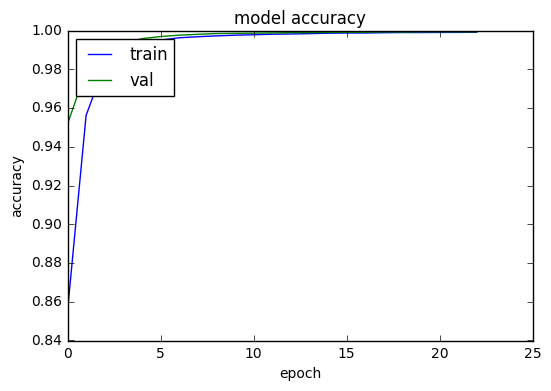

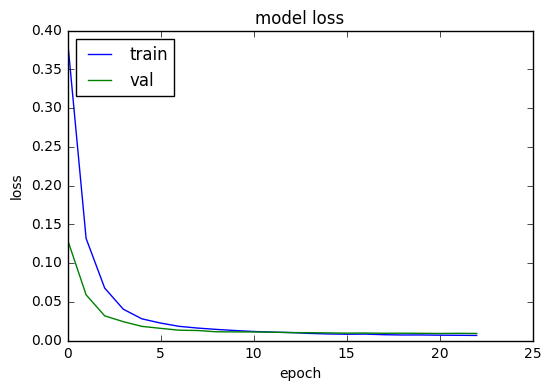

In [57]:
# summarize history for accuracy
plt.plot(his_mod2.history['acc'])
plt.plot(his_mod2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(his_mod2.history['loss'])
plt.plot(his_mod2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [58]:
# #Plotting model
# plot_model(Model2, to_file='Model2.png', show_shapes=True)
# IPython.display.Image('Model2.png')

56962/56962 [==============================] - 7s 127us/step
Accuracy MLP: 0.9992099996488887
56962/56962 [==============================] - 7s 120us/step
Loss value: 0.008827306184946626
Recall_score: 0.9693877551020408
Precision_score: 0.6934306569343066
F-score: 0.8085106382978723


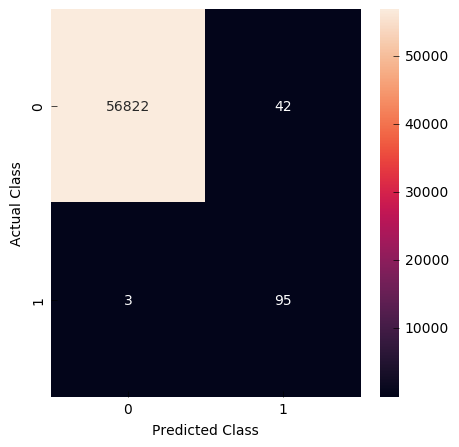

In [59]:
print('Accuracy MLP: '+ str(Model2.evaluate(Xtest_arr,Ytest_arr)[1]))
print('Loss value: '+ str(Model2.evaluate(Xtest_arr,Ytest_arr)[0]))

Y_mod2_pred = Model2.predict_classes(Xtest_arr, batch_size=200, verbose=0)
print('Recall_score: ' + str(recall_score(Ytest_arr,Y_mod2_pred)))
print('Precision_score: ' + str(precision_score(Ytest_arr, Y_mod2_pred)))
print('F-score: ' + str(f1_score(Ytest_arr,Y_mod2_pred)))
conf_matrix(Y_mod2_pred)

First, let's compare the ROC and PR curves before iterating the model.

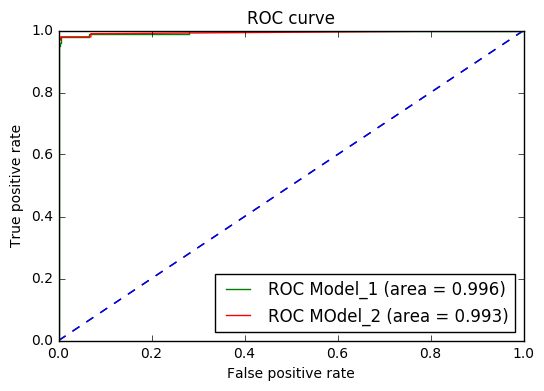

In [60]:
Y_pred_prob2 = Model2.predict_proba(Xtest_arr).ravel()

fpr_model2, tpr_model2, thresholds_model2 = roc_curve(Ytest_arr, Y_pred_prob2, pos_label=1)
auc_model2 = roc_auc_score(Ytest_arr, Y_pred_prob2)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
#plot the roc curve for the model
plt.plot(fpr_model1, tpr_model1, label='ROC Model_1 (area = {:.3f})'.format(auc_model1))
plt.plot(fpr_model2, tpr_model2, label='ROC MOdel_2 (area = {:.3f})'.format(auc_model2))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

As observed, ROC curve is of no use. It does not provide any useful information. Thus, consider a P-R curve

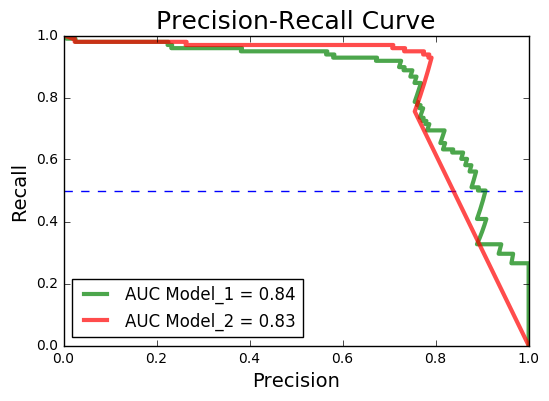

In [61]:
#Calculating Precision and Recall for various thresholds
precision_2, recall_2, thresholds_pr_2 = precision_recall_curve(Ytest_arr, Y_pred_prob2)

#Auc for PR curve
AUC_PRcurve_2= auc(recall_2, precision_2)

plt.figure(1)
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
#plot PR curve
plt.plot(precision, recall, label = "AUC Model_1 = {:0.2f}".format(AUC_PRcurve), lw = 3, alpha = 0.7)
plt.plot(precision_2, recall_2, label = "AUC Model_2 = {:0.2f}".format(AUC_PRcurve_2), lw = 3, alpha = 0.7)
plt.xlabel('Precision', fontsize = 14)
plt.ylabel('Recall', fontsize = 14)
plt.title('Precision-Recall Curve', fontsize = 18)
plt.legend(loc='best')
plt.show()

In [62]:
#Iterating Model-2 with 2 hidden layer for 60 iterations.

f_scorelist2=[]

n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
for i in range(0,60):
    
    Second_Model = Sequential()
    Second_Model.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
    Second_Model.add(Dropout(0.5))
    Second_Model.add(Dense(65, kernel_initializer='he_normal', activation='relu'))
    Second_Model.add(Dropout(0.5))
    Second_Model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

    Second_Model.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    Second_Model.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=0)
    Y_second_pred = Second_Model.predict_classes(Xtest_arr, batch_size=200, verbose=0)
    
    f_score= f1_score(Ytest_arr,Y_second_pred)
    f_scorelist2.append(f_score)

print(f_scorelist2)
print('FScore Mean: '+ str(np.mean(f_scorelist2)))
print('-'*88)

[0.7883817427385892, 0.7883817427385892, 0.8034188034188035, 0.8138528138528139, 0.7661290322580645, 0.7983193277310924, 0.7450980392156862, 0.8068669527896996, 0.8193832599118942, 0.7800829875518671, 0.7203065134099617, 0.8034934497816593, 0.798283261802575, 0.7896995708154506, 0.746987951807229, 0.6714285714285715, 0.7148288973384029, 0.6934306569343065, 0.7768595041322315, 0.7983193277310924, 0.7899159663865546, 0.8, 0.7833333333333333, 0.6886446886446886, 0.7736625514403292, 0.7851239669421487, 0.7833333333333333, 0.8070175438596492, 0.808695652173913, 0.7569721115537849, 0.8138528138528139, 0.7833333333333333, 0.7848101265822784, 0.7983193277310924, 0.7833333333333333, 0.7786885245901639, 0.7983193277310924, 0.6375838926174496, 0.8068669527896996, 0.7786885245901639, 0.7704918032786885, 0.8122270742358079, 0.7833333333333333, 0.7723577235772356, 0.752, 0.7654320987654321, 0.8068669527896996, 0.7380952380952381, 0.7509881422924902, 0.7615062761506277, 0.810344827586207, 0.720306513

In [63]:
#RESULTS ANALYSIS

* If the Null Hypothesis is accepted, this means there is no difference between the datasets and the change of number of hidden layers does not affect the performance of the model.
*  If the Null Hypothesis is rejected, this means there is significant difference between the datasets and the change of number of hidden layers affects the performance of the model.

In [64]:
#Comparing the mean performance of the F-score for both the models
print('Model-1')
print('---------')
print('Average F-Score: '+ str(np.mean(f_scorelist1)))

print('-'*40)

print('Model-2')
print('---------')
print('Average F-Score: '+ str(np.mean(f_scorelist2)))

Model-1
---------
Average F-Score: 0.7186867876877076
----------------------------------------
Model-2
---------
Average F-Score: 0.7724328728025692


In [65]:
#Comparing the Standard Deviation for F-scores generated after iterations
fscore_df1=pd.DataFrame(f_scorelist1)

print('Model-1')
print('------------------')
print('F_score SD: ' + str(fscore_df1.std()))

print('-'*40)

fscore_df2=pd.DataFrame(f_scorelist2)

print('Model-2')
print('------------------')
print('F_score SD: ' + str(fscore_df2.std()))

Model-1
------------------
F_score SD: 0    0.039977
dtype: float64
----------------------------------------
Model-2
------------------
F_score SD: 0    0.03735
dtype: float64


{'boxes': [<matplotlib.lines.Line2D at 0x206aaf172e8>,
 'caps': [<matplotlib.lines.Line2D at 0x206aaf1e6a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x206a8783940>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x206aaf1edd8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x206aaf17a20>,
  <matplotlib.lines.Line2D at 0x206aaef6860>]}

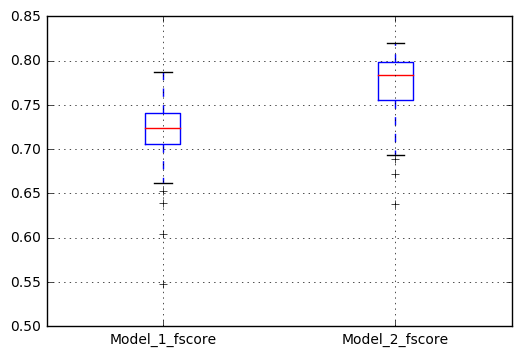

In [66]:
#Visualize the results using a boxplot()

results_fscore= pd.concat([fscore_df1, fscore_df2], axis=1)
results_fscore.columns = ['Model_1_fscore', 'Model_2_fscore']

results_fscore.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206A87C60F0>,
      dtype=object)

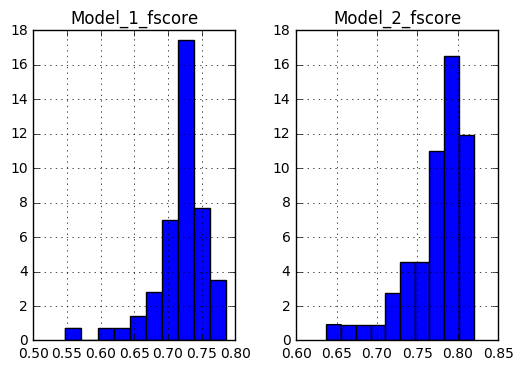

In [68]:
#Distribution of the data using a Histogram
results_fscore.hist(normed=True)

In [69]:
#Testing the Null Hypothesis that a sample comes from a Normal Distribution
alpha = 0.05;

s, p = stats.normaltest(fscore_df1)
if p < alpha:
  print('Model-1 Data is not normal')
else:
  print('Model-1 Data is normal')

s, p = stats.normaltest(fscore_df2)
if p < alpha:
  print('Model-2 Data is not normal')
else:
  print('Model-2 Data is normal')

Model-1 Data is not normal
Model-2 Data is not normal


In [70]:
#Wilcoxon Signed-Rank Test
#It tests the null hypothesis that two related paired samples come from the same distribution.
#It is a non-parametric version of the paired T-test.

s, p = stats.wilcoxon(fscore_df1[0], fscore_df2[0])

if p < 0.05:
  print('null hypothesis rejected, significant difference between the data-sets')
else:
  print('null hypothesis accepted, no significant difference between the data-sets')

null hypothesis rejected, significant difference between the data-sets
